In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions

IPythonConsole.ipython_useSVG = False
DrawingOptions.includeAtomNumbers=True

In [2]:
from molpher.core import ExplorationTree as ETree
from molpher.core import MolpherMol

captopril = MolpherMol("captopril.sdf")
tree = ETree.create(source=captopril)

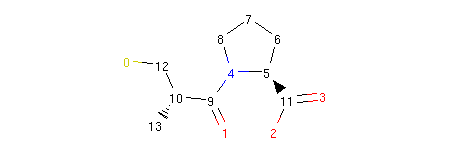

In [3]:
tree.leaves[0].asRDMol()

In [5]:
print('Source: ', tree.params['source'])

Source:  CC(CS)C(=O)N1CCCC1C(=O)O


In [7]:
tree.params

{'source': 'CC(CS)C(=O)N1CCCC1C(=O)O',
 'target': None,
 'operators': ('OP_ADD_ATOM',
  'OP_REMOVE_ATOM',
  'OP_ADD_BOND',
  'OP_REMOVE_BOND',
  'OP_MUTATE_ATOM',
  'OP_INTERLAY_ATOM',
  'OP_BOND_REROUTE',
  'OP_BOND_CONTRACTION'),
 'fingerprint': 'FP_MORGAN',
 'similarity': 'SC_TANIMOTO',
 'weight_min': 0.0,
 'weight_max': 100000.0,
 'accept_min': 50,
 'accept_max': 100,
 'far_produce': 80,
 'close_produce': 150,
 'far_close_threshold': 0.15,
 'max_morphs_total': 1500,
 'non_producing_survive': 5}

In [10]:
tree.params = {
    'non_producing_survive' : 2
    , 'weight_max' : 500.0
}
tree.params

{'source': 'CC(CS)C(=O)N1CCCC1C(=O)O',
 'target': None,
 'operators': ('OP_ADD_ATOM',
  'OP_REMOVE_ATOM',
  'OP_ADD_BOND',
  'OP_REMOVE_BOND',
  'OP_MUTATE_ATOM',
  'OP_INTERLAY_ATOM',
  'OP_BOND_REROUTE',
  'OP_BOND_CONTRACTION'),
 'fingerprint': 'FP_MORGAN',
 'similarity': 'SC_TANIMOTO',
 'weight_min': 0.0,
 'weight_max': 500.0,
 'accept_min': 50,
 'accept_max': 100,
 'far_produce': 80,
 'close_produce': 150,
 'far_close_threshold': 0.15,
 'max_morphs_total': 1500,
 'non_producing_survive': 2}

In [ ]:
from rdkit.Chem.Draw import MolsToGridImage

def get_locked_atoms(mol):
    return [(idx, atm) for idx, atm in enumerate(mol.atoms) if atm.is_locked]

def show_mol_grid(mols):
    locked_atoms = [[y[0] for y in get_locked_atoms(x)] for x in mols]
    return MolsToGridImage(
        [x.asRDMol() for x in mols]
        , subImgSize=(250,200)
        , highlightAtomLists=locked_atoms
        , legends=[x.parent_operator for x in mols]
    )

mol = MolpherMol("captopril.sdf")
show_mol_grid([mol])

In [ ]:
for idx, atom in enumerate(mol.atoms):
    print(idx+1, atom.getLockingMask())

In [ ]:
from molpher.core import ExplorationTree

tree = ExplorationTree.create(source=mol)
tree.generateMorphs()
tree.sortMorphs()
tree.filterMorphs()
tree.extend()
show_mol_grid(tree.leaves)